# Model Selection

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import sparse
import re

In [3]:
from itertools import chain

import nltk
import sklearn
import scipy.stats
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV


In [4]:
sparse_train = sp.sparse.load_npz('transitional_data/X5_train.npz')
sparse_dev = sp.sparse.load_npz('transitional_data/X5_dev.npz')

In [5]:
y_train = pd.read_csv("transitional_data/y_train.csv")
y_dev = pd.read_csv("transitional_data/y_dev.csv")

In [6]:
y_train = y_train.groupby(by = 'SentenceNR', group_keys=True).apply(lambda x: x)
y_train = y_train.rename(columns={"SentenceNR": "Sent", "Unnamed: 1": "TokenNr"})

In [7]:
y_dev = y_dev.groupby(by = 'SentenceNR', group_keys=True).apply(lambda x: x)
y_dev = y_dev.rename(columns={"SentenceNR": "Sent", "Unnamed: 1": "TokenNr"})

In [8]:
train_true = y_train["Label"]
dev_true = y_dev["Label"]

In [23]:
param_grid = {
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "class_weight": ["balanced", None],
}

In [24]:
svc = LinearSVC()

In [25]:
%%time
svc_gs = GridSearchCV(svc, param_grid, scoring = "f1_weighted", n_jobs = -1, refit='accuracy', cv=0, verbose=1 )
svc_gs.fit(sparse_train, train_true)
svc_gs.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/svm/_base.py", line 1204, in _fit_liblinear
    solver

CPU times: user 25.5 s, sys: 195 ms, total: 25.7 s
Wall time: 2min 47s


/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9443774335931711

In [26]:
svc_gs.best_params_

{'class_weight': None, 'loss': 'hinge', 'penalty': 'l2'}

In [27]:
svc_gs.cv_results_

{'mean_fit_time': array([ 0.61112084, 73.55176854,  0.59393926, 99.03756495,  0.54437971,
        62.793436  ,  0.51165848, 57.13910666]),
 'std_fit_time': array([7.15223317e-03, 1.02568628e+00, 1.78753626e-02, 9.18787842e-01,
        1.28932396e-02, 8.07852753e+00, 2.02344079e-02, 7.82396835e+00]),
 'mean_score_time': array([0.        , 0.56579585, 0.        , 0.51427078, 0.        ,
        0.41049962, 0.        , 0.29104586]),
 'std_score_time': array([0.        , 0.01051894, 0.        , 0.09568159, 0.        ,
        0.1215277 , 0.        , 0.01734194]),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced', None,
                    None, None, None],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['hinge', 'hinge', 'squared_hinge', 'squared_hinge',
                    'hinge', 'hinge', 'squared_hinge', 'squared_hinge'],
           

In [29]:
regularization_grid1 = {
    "penalty": ["l2"],
    "loss": ["hinge"],
    "class_weight": [None],
    "C": [0.001, 0.01, 0.1, 1],
}

In [30]:
%%time
svc_gs = GridSearchCV(svc, regularization_grid1, scoring = "f1_weighted", n_jobs = -1, refit='accuracy', cv=5, verbose=1 )
svc_gs.fit(sparse_train, train_true)
svc_gs.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 25.3 s, sys: 91.2 ms, total: 25.4 s
Wall time: 1min 48s


/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9443956946408065

In [31]:
svc_gs.best_params_

{'C': 1, 'class_weight': None, 'loss': 'hinge', 'penalty': 'l2'}

In [32]:
svc_gs.cv_results_

{'mean_fit_time': array([29.87864785, 37.3456902 , 39.3514617 , 45.54885588]),
 'std_fit_time': array([1.81097668, 1.77885496, 5.71194149, 1.10663903]),
 'mean_score_time': array([0.56772723, 0.56437969, 0.36204786, 0.29094071]),
 'std_score_time': array([0.00781076, 0.00966763, 0.08936824, 0.01373026]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=[None, None, None, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['hinge', 'hinge', 'hinge', 'hinge'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001,
   'class_we

In [33]:
regularization_grid2 = {
    "penalty": ["l2"],
    "loss": ["hinge"],
    "class_weight": [None],
    "C": [0.2, 0.4, 0.6, 0.8, 1.0],
}

In [34]:
%%time
svc_gs = GridSearchCV(svc, regularization_grid2, scoring = "f1_weighted", n_jobs = -1, refit='accuracy', cv=5, verbose=1 )
svc_gs.fit(sparse_train, train_true)
svc_gs.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 22.5 s, sys: 133 ms, total: 22.6 s
Wall time: 2min 52s


/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9462532169191098

In [35]:
svc_gs.best_params_

{'C': 0.4, 'class_weight': None, 'loss': 'hinge', 'penalty': 'l2'}

In [36]:
svc_gs.cv_results_

{'mean_fit_time': array([55.44876342, 64.75790887, 69.2640831 , 70.35478449, 59.3426775 ]),
 'std_fit_time': array([ 1.5577506 ,  1.22817837,  1.2343852 ,  2.14736422, 16.35957288]),
 'mean_score_time': array([0.55639315, 0.57585073, 0.55520101, 0.35943203, 0.28968396]),
 'std_score_time': array([0.00970917, 0.04772091, 0.01394407, 0.09013687, 0.01448649]),
 'param_C': masked_array(data=[0.2, 0.4, 0.6, 0.8, 1.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=[None, None, None, None, None],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['hinge', 'hinge', 'hinge', 'hinge', 'hinge'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2'],
              mask=[False, False, Fals

In [40]:
regularization_grid3 = {
    "penalty": ["l2"],
    "loss": ["hinge"],
    "class_weight": [None],
    "C": [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55],
}

In [41]:
%%time
svc_gs = GridSearchCV(svc, regularization_grid3, scoring = "f1_weighted", n_jobs = -1, refit='accuracy', cv=5, verbose=1 )
svc_gs.fit(sparse_train, train_true)
svc_gs.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
CPU times: user 22.2 s, sys: 129 ms, total: 22.3 s
Wall time: 3min 31s


/opt/python-venv/teaching/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9463198083146469

In [42]:
svc_gs.best_params_

{'C': 0.35, 'class_weight': None, 'loss': 'hinge', 'penalty': 'l2'}

In [43]:
svc_gs.cv_results_

{'mean_fit_time': array([59.49461484, 61.38623385, 62.69376602, 64.66976638, 64.79793425,
        59.91664267, 58.55881348]),
 'std_fit_time': array([1.15413159, 1.32367912, 1.05066868, 2.02375587, 2.33354859,
        2.29413409, 2.75102115]),
 'mean_score_time': array([0.58273444, 0.56601439, 0.56533198, 0.57672439, 0.57468157,
        0.36247888, 0.29188786]),
 'std_score_time': array([0.04582077, 0.01601401, 0.03386912, 0.03144619, 0.0309859 ,
        0.10157721, 0.01893803]),
 'param_C': masked_array(data=[0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=[None, None, None, None, None, None, None],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['hinge', 'hinge', 'hinge', 'hinge', 'hinge', 'hinge',
                    'hinge'

In [9]:
from evaluation import get_all_labels, get_classify_report, get_recognition_report, get_confusion_matrix

In [10]:
svc = LinearSVC( loss = "hinge", C = 0.35)
%time svc.fit(sparse_train, train_true)

CPU times: user 21.7 s, sys: 146 ms, total: 21.8 s
Wall time: 21.8 s


/home/ccl/oj43ecpu/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=0.35, loss='hinge')

In [11]:
%%time
dev_pred = svc.predict(sparse_dev)

CPU times: user 17.5 ms, sys: 3.81 ms, total: 21.3 ms
Wall time: 19.9 ms


In [12]:
%time labels_pred = get_all_labels(dev_pred)
%time labels_true = get_all_labels(dev_true.tolist())

CPU times: user 32.1 ms, sys: 2 µs, total: 32.1 ms
Wall time: 32 ms
CPU times: user 5.63 ms, sys: 58 µs, total: 5.69 ms
Wall time: 5.44 ms


In [13]:
detected_true, valid_pred = get_classify_report(labels_true, labels_pred, report=True)

              precision    recall  f1-score   support

 CASE_NUMBER       0.99      0.96      0.97        70
       COURT       0.99      1.00      1.00       130
        DATE       1.00      1.00      1.00       208
         GPE       0.97      0.97      0.97       128
       JUDGE       0.50      1.00      0.67         7
         ORG       0.80      0.83      0.81        58
OTHER_PERSON       0.88      0.81      0.84       217
  PETITIONER       0.30      0.38      0.33         8
   PRECEDENT       0.79      0.84      0.82        69
   PROVISION       0.99      1.00      1.00       197
  RESPONDENT       0.00      0.00      0.00         2
     STATUTE       0.99      0.99      0.99       180
     WITNESS       0.69      0.69      0.69        45

    accuracy                           0.93      1319
   macro avg       0.76      0.80      0.78      1319
weighted avg       0.93      0.93      0.93      1319



In [14]:
all_labels_compare = get_recognition_report(true = labels_true, pred = labels_pred, report=True)

              precision    recall  f1-score   support

 CASE_NUMBER       0.58      0.55      0.57       121
       COURT       0.82      0.73      0.77       178
        DATE       0.90      0.94      0.92       222
         GPE       0.64      0.68      0.66       182
       JUDGE       0.32      0.88      0.47         8
         ORG       0.41      0.30      0.35       159
OTHER_PERSON       0.75      0.64      0.69       276
  PETITIONER       0.21      0.33      0.26         9
   PRECEDENT       0.37      0.33      0.35       177
   PROVISION       0.76      0.76      0.76       258
  RESPONDENT       0.00      0.00      0.00         5
     STATUTE       0.81      0.80      0.80       222
     WITNESS       0.48      0.53      0.50        58

   micro avg       0.68      0.65      0.67      1875
   macro avg       0.54      0.58      0.55      1875
weighted avg       0.68      0.65      0.67      1875



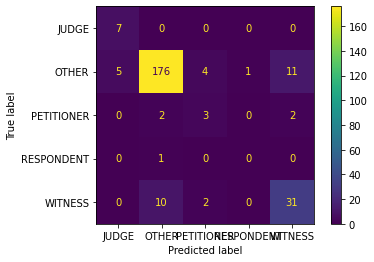

In [15]:
get_confusion_matrix(pred = all_labels_compare["pred"], true = all_labels_compare["true"], cat="natural_person")

In [39]:
from sklearn.feature_selection import SelectFromModel
X, y = sparse_train, train_true
print(f"X.shape: {X.shape}")
lsvc_l1 = LinearSVC( penalty='l1', loss = "squared_hinge", dual = False, C = 0.35).fit(X, y)
lsvc_l2 = LinearSVC( penalty='l2', loss = "hinge", C = 0.35).fit(X, y)

X.shape: (349077, 71646)


/home/ccl/oj43ecpu/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [42]:
# L1 norm
model_l1 = SelectFromModel(lsvc_l1, prefit=True)
X_train_new = model_l1.transform(X)
X_dev_new = model_l1.transform(sparse_dev)
print(f"X_train_new.shape: {X_train_new.shape}")
print(f"X_dev_new.shape: {X_dev_new.shape}")

X_train_new.shape: (349077, 18550)
X_dev_new.shape: (37455, 18550)


In [43]:
# L2 norm
model_l2 = SelectFromModel(lsvc_l2, prefit=True)
X_train_new = model_l2.transform(X)
X_dev_new = model_l2.transform(sparse_dev)
print(f"X_train_new.shape: {X_train_new.shape}")
print(f"X_dev_new.shape: {X_dev_new.shape}")

X_train_new.shape: (349077, 25492)
X_dev_new.shape: (37455, 25492)


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X_train, y_train = sparse_train, train_true
print(f"X_train.shape: {X_train.shape}")
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)

X_train.shape: (349077, 71646)


In [30]:
clf.feature_importances_.shape

(71646,)

In [31]:
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_dev_new = model.transform(sparse_dev)
print(f"X_train_new.shape: {X_train_new.shape}")
print(f"X_dev_new.shape: {X_dev_new.shape}")

X_train_new.shape: (349077, 6983)
X_dev_new.shape: (37455, 6983)


In [32]:
%%time
dev_pred = clf.predict(sparse_dev)

CPU times: user 1.13 s, sys: 3 µs, total: 1.13 s
Wall time: 1.13 s


In [33]:
%time labels_pred = get_all_labels(dev_pred)
%time labels_true = get_all_labels(dev_true.tolist())

CPU times: user 5.58 ms, sys: 0 ns, total: 5.58 ms
Wall time: 5.29 ms
CPU times: user 5.59 ms, sys: 0 ns, total: 5.59 ms
Wall time: 5.5 ms


In [34]:
all_labels_compare = get_recognition_report(true = labels_true, pred = labels_pred, report=True)

              precision    recall  f1-score   support

 CASE_NUMBER       0.58      0.37      0.45       121
       COURT       0.87      0.74      0.80       178
        DATE       0.92      0.83      0.87       222
         GPE       0.55      0.34      0.42       182
       JUDGE       0.45      0.62      0.53         8
         ORG       0.46      0.23      0.30       159
OTHER_PERSON       0.57      0.34      0.43       276
  PETITIONER       0.00      0.00      0.00         9
   PRECEDENT       0.28      0.21      0.24       177
   PROVISION       0.78      0.76      0.77       258
  RESPONDENT       0.00      0.00      0.00         5
     STATUTE       0.88      0.76      0.82       222
     WITNESS       0.29      0.16      0.20        58

   micro avg       0.69      0.52      0.59      1875
   macro avg       0.51      0.41      0.45      1875
weighted avg       0.65      0.52      0.57      1875



/home/ccl/oj43ecpu/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

In [10]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [11]:
df_train = pd.read_csv("transitional_data/tagged_train_filled.csv", keep_default_na=False)
df_dev = pd.read_csv("transitional_data/tagged_dev_filled.csv", keep_default_na=False)

In [12]:
train = df_train[["Token", "standard_tagger", "Label"]]
dev = df_dev[["Token", "standard_tagger", "Label"]]

In [13]:
train = train.values.tolist()
dev = dev.values.tolist()

In [14]:
def enumerate_tokens(sentence):
    c = 1
    for index, row in sentence.iterrows():
        sentence.at[index, 'TokenNR'] = c
        c += 1
    return sentence

In [15]:
%time df_dev = df_dev.groupby(by = 'SentenceNR', group_keys=True).apply(enumerate_tokens)
%time df_train = df_train.groupby(by = 'SentenceNR', group_keys=True).apply(enumerate_tokens)

CPU times: user 2.84 s, sys: 0 ns, total: 2.84 s
Wall time: 2.83 s
CPU times: user 26.9 s, sys: 37 ms, total: 27 s
Wall time: 26.9 s


In [16]:
train_SentenceNR = df_train.SentenceNR.unique()
dev_SentenceNR = df_dev.SentenceNR.unique()

In [17]:
train_sents = [df_train[ df_train["SentenceNR"]==nr][["Token", "standard_tagger", "Label"]].values.tolist() for nr in train_SentenceNR ]
dev_sents = [df_dev[ df_dev["SentenceNR"]==nr][["Token", "standard_tagger", "Label"]].values.tolist() for nr in dev_SentenceNR ]

In [18]:
%%time
X_train = [sent2features(s) for s in train_sents]
y_train = [sent2labels(s) for s in train_sents]

X_dev = [sent2features(s) for s in dev_sents]
y_dev = [sent2labels(s) for s in dev_sents]

CPU times: user 584 ms, sys: 88.2 ms, total: 673 ms
Wall time: 670 ms


In [22]:
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    #{'c1': 0.17311222730699913, 'c2': 0.2034091783796535}
    c1=0.17311222730699913,
    c2=0.2034091783796535,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)


CPU times: user 1min 15s, sys: 57.5 ms, total: 1min 15s
Wall time: 1min 15s


/home/ccl/oj43ecpu/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.17311222730699913,
    c2=0.2034091783796535, keep_tempfiles=None, max_iterations=100)

In [23]:
labels = ['B-ORG', 'I-ORG', 'B-OTHER_PERSON', 'I-OTHER_PERSON', 'B-WITNESS', 'I-WITNESS', 'B-GPE', 'B-STATUTE', 'B-DATE', 'I-DATE', 'B-PROVISION', 'I-PROVISION', 'I-STATUTE', 'B-COURT', 'I-COURT', 'B-PRECEDENT', 'I-PRECEDENT', 'B-CASE_NUMBER', 'I-CASE_NUMBER', 'I-GPE', 'B-PETITIONER', 'I-PETITIONER', 'B-JUDGE', 'I-JUDGE', 'B-RESPONDENT', 'I-RESPONDENT']


In [24]:
y_pred = crf.predict(X_dev)

In [25]:
from evaluation import get_recognition_report, get_all_labels

In [26]:
from functools import reduce
y_dev = reduce(lambda a,b:a+b, y_dev)
y_pred = reduce(lambda a,b:a+b, y_pred)

In [27]:
y_pred = get_all_labels(y_pred)
y_true = get_all_labels(y_dev)

In [28]:
all_labels_compare = get_recognition_report(y_true, y_pred, report=True)

              precision    recall  f1-score   support

 CASE_NUMBER       0.79      0.64      0.71       121
       COURT       0.89      0.83      0.85       178
        DATE       0.95      0.91      0.93       222
         GPE       0.68      0.54      0.60       182
       JUDGE       0.80      1.00      0.89         8
         ORG       0.66      0.47      0.55       159
OTHER_PERSON       0.78      0.71      0.74       276
  PETITIONER       0.30      0.33      0.32         9
   PRECEDENT       0.68      0.60      0.64       177
   PROVISION       0.92      0.87      0.89       258
  RESPONDENT       0.00      0.00      0.00         5
     STATUTE       0.87      0.82      0.85       222
     WITNESS       0.59      0.47      0.52        58

   micro avg       0.81      0.72      0.76      1875
   macro avg       0.68      0.63      0.65      1875
weighted avg       0.80      0.72      0.75      1875



In [34]:
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s \t->\t %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

Top likely transitions:
B-COURT 	->	 I-COURT 6.634040
I-ORG  	->	 I-ORG   6.604673
B-ORG  	->	 I-ORG   6.581671
I-PROVISION 	->	 I-PROVISION 6.508698
B-CASE_NUMBER 	->	 I-CASE_NUMBER 6.089499
B-RESPONDENT 	->	 I-RESPONDENT 6.088118
B-PROVISION 	->	 I-PROVISION 6.055514
B-JUDGE 	->	 I-JUDGE 6.051411
I-COURT 	->	 I-COURT 5.929151
I-RESPONDENT 	->	 I-RESPONDENT 5.891065
B-PETITIONER 	->	 I-PETITIONER 5.886041
I-CASE_NUMBER 	->	 I-CASE_NUMBER 5.739036
I-STATUTE 	->	 I-STATUTE 5.672302
B-OTHER_PERSON 	->	 I-OTHER_PERSON 5.514474
B-PRECEDENT 	->	 I-PRECEDENT 5.307245
B-STATUTE 	->	 I-STATUTE 5.240033
I-PRECEDENT 	->	 I-PRECEDENT 5.196088
I-PETITIONER 	->	 I-PETITIONER 5.169114
I-JUDGE 	->	 I-JUDGE 4.944655
B-DATE 	->	 I-DATE  4.731277


In [35]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-30:])

Top positive:
5.912660 B-JUDGE  -1:word.lower():justice
5.840469 B-ORG    word.lower():parliament
5.659227 B-STATUTE word.lower():constitution
5.058730 B-PETITIONER -1:word.lower():appellant
5.020820 B-WITNESS -1:word.lower():witness
4.942253 B-GPE    -1:word.lower():village
4.599063 o        BOS
4.479745 B-OTHER_PERSON -1:word.lower():mr.
4.363304 B-RESPONDENT -1:word.lower():respondent
4.334479 B-STATUTE word[-2:]:PC
4.088398 B-JUDGE  +1:word.lower():j.
4.054246 B-PETITIONER -1:word.lower():petitioner
3.889782 B-STATUTE word.lower():cr.p.c.
3.813236 o        word.lower():shri
3.689824 o        EOS
3.653998 B-ORG    -1:word.lower():m/s.
3.639895 B-RESPONDENT word.lower():sidhu-respondent
3.639895 B-RESPONDENT -1:word.lower():prof.
3.615445 B-DATE   -1:word.lower():dated
3.558988 I-PROVISION -1:word.lower():section
3.459603 B-OTHER_PERSON -1:word.lower():shri
3.416740 B-OTHER_PERSON -1:word.lower():lord
3.401350 B-OTHER_PERSON BOS
3.380099 B-GPE    -1:word.lower():district
3.341876 B-O

In [29]:
sklearn.__version__

'0.23.2'

In [22]:
%%time
# define fixed parameters and parameters to search
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 26.0min finished


CPU times: user 3min 51s, sys: 15 s, total: 4min 6s
Wall time: 27min 12s


RandomizedSearchCV(cv=3,
                   estimator=CRF(algorithm='lbfgs',
                                 all_possible_transitions=True,
                                 keep_tempfiles=None, max_iterations=100),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'c1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7b71df0d90>,
                                        'c2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7b71dc0640>},
                   scoring=make_scorer(flat_f1_score, av...=weighted, labels=['B-ORG', 'I-ORG', 'B-OTHER_PERSON', 'I-OTHER_PERSON', 'B-WITNESS', 'I-WITNESS', 'B-GPE', 'B-STATUTE', 'B-DATE', 'I-DATE', 'B-PROVISION', 'I-PROVISION', 'I-STATUTE', 'B-COURT', 'I-COURT', 'B-PRECEDENT', 'I-PRECEDENT', 'B-CASE_NUMBER', 'I-CASE_NUMBER', 'I-GPE', 'B-PETITIONER', 'I-PETITIONER', 'B-JUDGE', 'I-JUDGE', 'B-RESPONDENT', 'I-RESPONDENT']),
                   verbose=1)

In [23]:
# crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

best params: {'c1': 0.17311222730699913, 'c2': 0.2034091783796535}
best CV score: 0.8064517715530343
model size: 2.56M


In [51]:
crf = rs.best_estimator_
y_pred = crf.predict(X_dev)
#print(metrics.flat_classification_report(
#    y_true, y_pred, labels=sorted_labels, digits=3
#))

In [52]:
y_dev = reduce(lambda a,b:a+b, y_dev)
y_pred = reduce(lambda a,b:a+b, y_pred)

In [53]:
y_pred = get_all_labels(y_pred)
y_true = get_all_labels(y_dev)

In [54]:
all_labels_compare = get_recognition_report(y_true, y_pred, report=True)

              precision    recall  f1-score   support

                   0.00      0.00      0.00    2377.0

   micro avg       0.00      0.00      0.00    2377.0
   macro avg       0.00      0.00      0.00    2377.0
weighted avg       0.00      0.00      0.00    2377.0



In [ ]:
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])